In [1]:
"""1. 필요한 모듈 Import"""

from pycaret.datasets import get_data
from pycaret.classification import *
import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import warnings


warnings.filterwarnings('ignore')

이번 Tutorial에서 진행하고자 하는 것은 stacking을 통한 Ensemble of Ensemble 입니다. 

총 3가지의 Ensemble 모델들을 조합하여 더 좋은 성능을 내는 것을 목표로 진행할 예정입니다.

이때 사용하고자 하는 모델들은 다음과 같습니다.

- LightGBM
 
- XGBoost

- CatBoost

In [88]:
get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


먼저 위의 코드를 통하여 Pycaret에서 제공하는 Dataset을 확인합니다. 저는 이중 Regression을 진행할 수 있는 Dataset을 사용하고자 합니다.

55 / traffic / Multivariate / Regression / traffic_volume / None / 48204 / 8 / N

이번 실험에는 2 가지 데이터 활용할 계획입니다.

1. Dacon 에서 가져온 건설기계 오일 상태 분류 AI 경진대회: Binary classification
- https://dacon.io/competitions/official/236013/overview/description


2. Pycaret 에서 가져온 bike data : Regression 

이 두가지 활용하여 Ensemble of Ensemble tutorial 진행해보도록 하겠습니다.

### Dacon 건설기계 오일 상태 분류 데이터

In [64]:
# Dacon 건설기계 오일 상태 분류 데이터

oil_train_data = pd.read_csv('./data/train.csv')
oil_test_data = pd.read_csv('./data/test.csv')
oil_submission_data = pd.read_csv('./data/sample_submission.csv')

oil_train = pd.DataFrame(oil_train_data)
oil_test = pd.DataFrame(oil_test_data)

print(f"Traffic Train data: {str(oil_train.shape)}")
print(f"Traffic Test data: {str(oil_test.shape)}")

Traffic Train data: (14095, 54)
Traffic Test data: (6041, 19)


In [65]:
# Y_LABEL을 int형에서 object형으로 변환
oil_train = oil_train.astype({'Y_LABEL' : 'object'})

In [66]:
# train data 확인, 결측치 확인

oil_train.info(), oil_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

(None,
 ID                         0
 COMPONENT_ARBITRARY        0
 ANONYMOUS_1                0
 YEAR                       0
 SAMPLE_TRANSFER_DAY        0
 ANONYMOUS_2                0
 AG                         0
 AL                         0
 B                          0
 BA                         0
 BE                         0
 CA                         0
 CD                      1394
 CO                         0
 CR                         0
 CU                         0
 FH2O                   10205
 FNOX                   10205
 FOPTIMETHGLY           10205
 FOXID                  10205
 FSO4                   10205
 FTBN                   10205
 FE                         0
 FUEL                   10205
 H2O                        0
 K                       2299
 LI                         0
 MG                         0
 MN                         0
 MO                         0
 NA                         0
 NI                         0
 P                          0
 PB

In [67]:
# test data 확인

oil_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041 entries, 0 to 6040
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6041 non-null   object 
 1   COMPONENT_ARBITRARY  6041 non-null   object 
 2   ANONYMOUS_1          6041 non-null   int64  
 3   YEAR                 6041 non-null   int64  
 4   ANONYMOUS_2          6041 non-null   int64  
 5   AG                   6041 non-null   int64  
 6   CO                   6041 non-null   int64  
 7   CR                   6041 non-null   int64  
 8   CU                   6041 non-null   int64  
 9   FE                   6041 non-null   int64  
 10  H2O                  6041 non-null   float64
 11  MN                   6041 non-null   int64  
 12  MO                   6041 non-null   int64  
 13  NI                   6041 non-null   int64  
 14  PQINDEX              6041 non-null   int64  
 15  TI                   6041 non-null   i

Oil_train 데이터에는 많은 결측치 존재하고 있습니다. 이에 결측치 10,000 넘어가는 항목 삭제하도록 하겠습니다.

In [68]:
del_list = []
for i in range(len(oil_train.columns)):
    if oil_train.isnull().sum()[i] > 10000:
        del_list.append(oil_train.columns[i])
        
oil_train = oil_train.drop( del_list, axis=1 )
    

남은 항목들의 결측치를 Interpolation(보간법)을 통하여 채워주도록 하겠습니다.

In [69]:
oil_train = oil_train.interpolate(method='values')

Categorical 변수인 'COMPONENT_ARBITRARY'는 One-hot encoding으로 채워주겠습니다.

In [70]:
# train 부분

dummy_frame = pd.get_dummies(oil_train['COMPONENT_ARBITRARY'])

oil_train = pd.concat([oil_train, dummy_frame], axis = 1)
oil_train.drop(['COMPONENT_ARBITRARY'], axis = 1, inplace = True)

In [71]:
# test 부분

dummy_frame = pd.get_dummies(oil_test['COMPONENT_ARBITRARY'])

oil_test = pd.concat([oil_test, dummy_frame], axis = 1)
oil_test.drop(['COMPONENT_ARBITRARY'], axis = 1, inplace = True)

Test 데이터에는 없는 변수인 다음의 변수들은 일단 Train 데이터에서 삭제하고 진행하겠습니다.

['SAMPLE_TRANSFER_DAY', 'AL', 'B', 'BA', 'BE', 'CA', 'CD', 'K', 'LI', 'MG', 'NA', 'P', 'PB', 'S', 'SB', 'SI', 'SN']

In [43]:
# del_list = ['SAMPLE_TRANSFER_DAY', 'AL', 'B', 'BA', 'BE', 'CA', 'CD', 'K', 'LI', 'MG', 'NA', 'P', 'PB', 'S', 'SB', 'SI', 'SN']
# oil_train.drop(del_list, axis = 1, inplace = True)

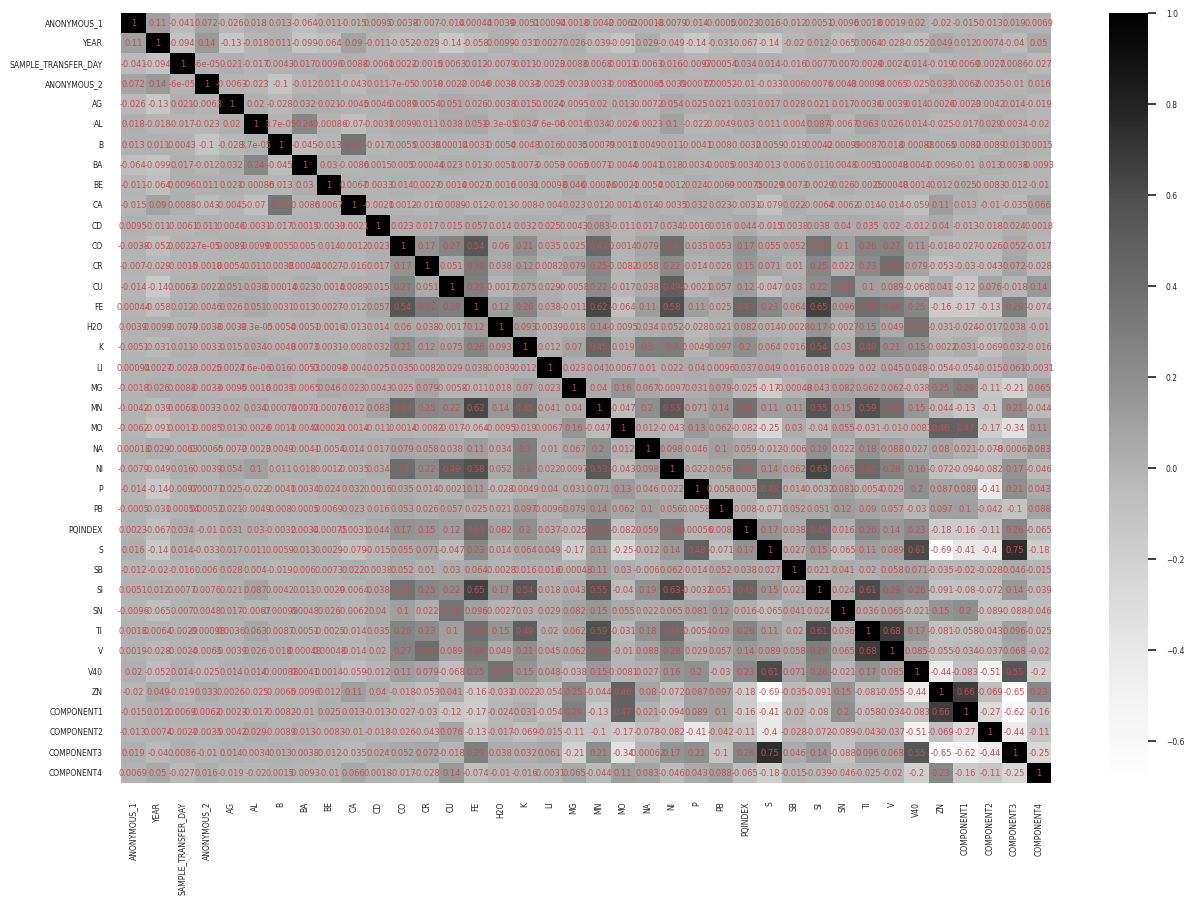

In [40]:
train_corr = oil_train.corr()
sns.set(rc = {'figure.figsize':(15,10)}, font_scale = 0.5)
ax = sns.heatmap(train_corr, annot=True, annot_kws=dict(color='r'), cmap='Greys')

Corr 분포를 통하여 비교적 낮은 변수들을 제거하려 했지만, 변수가 너무 많아 해석이 힘들어서 일단 그대로 진행해보도록 하겠습니다.

In [74]:
oil_train

,ID,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,...,SN,TI,V,V40,ZN,Y_LABEL,COMPONENT1,COMPONENT2,COMPONENT3,COMPONENT4
0,TRAIN_00000,1486,2011,7,200,0,3,93,0,0,...,2,5,0,154.0,75,0,0,0,1,0
1,TRAIN_00001,1350,2021,51,375,0,2,19,0,0,...,0,0,0,44.0,652,0,0,1,0,0
2,TRAIN_00002,2415,2015,2,200,0,110,1,1,0,...,1,0,0,72.6,412,1,0,1,0,0
3,TRAIN_00003,7389,2010,2,200,0,8,3,0,0,...,1,0,0,133.3,7,0,0,0,1,0
4,TRAIN_00004,3954,2015,4,200,0,1,157,0,0,...,0,0,0,133.1,128,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,1616,2014,8,200,0,2,201,1,0,...,0,0,0,135.4,16,0,0,0,1,0
14091,TRAIN_14091,2784,2013,2,200,0,3,85,0,0,...,0,0,0,117.5,1408,0,1,0,0,0
14092,TRAIN_14092,1788,2008,9,550,0,6,0,1,0,...,0,0,0,54.0,1301,0,0,0,1,0
14093,TRAIN_14093,2498,2009,19,550,0,2,4,0,0,...,0,0,0,44.3,652,0,0,1,0,0


Pycaret에 넣기 위하여 해당 데이터 형식 맞취주기.

In [75]:
from pycaret.classification import *

In [76]:
oil_train = setup(data = oil_train, target = 'Y_LABEL', session_id=123, fold_shuffle=True)

,Description,Value
0,session_id,123
1,Target,Y_LABEL
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14095, 40)"
5,Missing Values,False
6,Numeric Features,33
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [77]:
model_compare_oil = compare_models( ['xgboost', 'lightgbm', 'catboost'], n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9555,0.8888,0.5136,0.9351,0.6617,0.6402,0.6739,1.0160
catboost,CatBoost Classifier,0.9550,0.8863,0.4981,0.9533,0.6511,0.6299,0.6694,25.4350
xgboost,Extreme Gradient Boosting,0.9543,0.8783,0.5124,0.9147,0.6549,0.6327,0.6642,85.6360


다음과 같이, 각 개별 모델들을 만들 수 있습니다.

In [78]:
oil_xgboost = create_model('xgboost', verbose = False)
# plot_model(estimator = oil_xgboost, plot = 'feature')

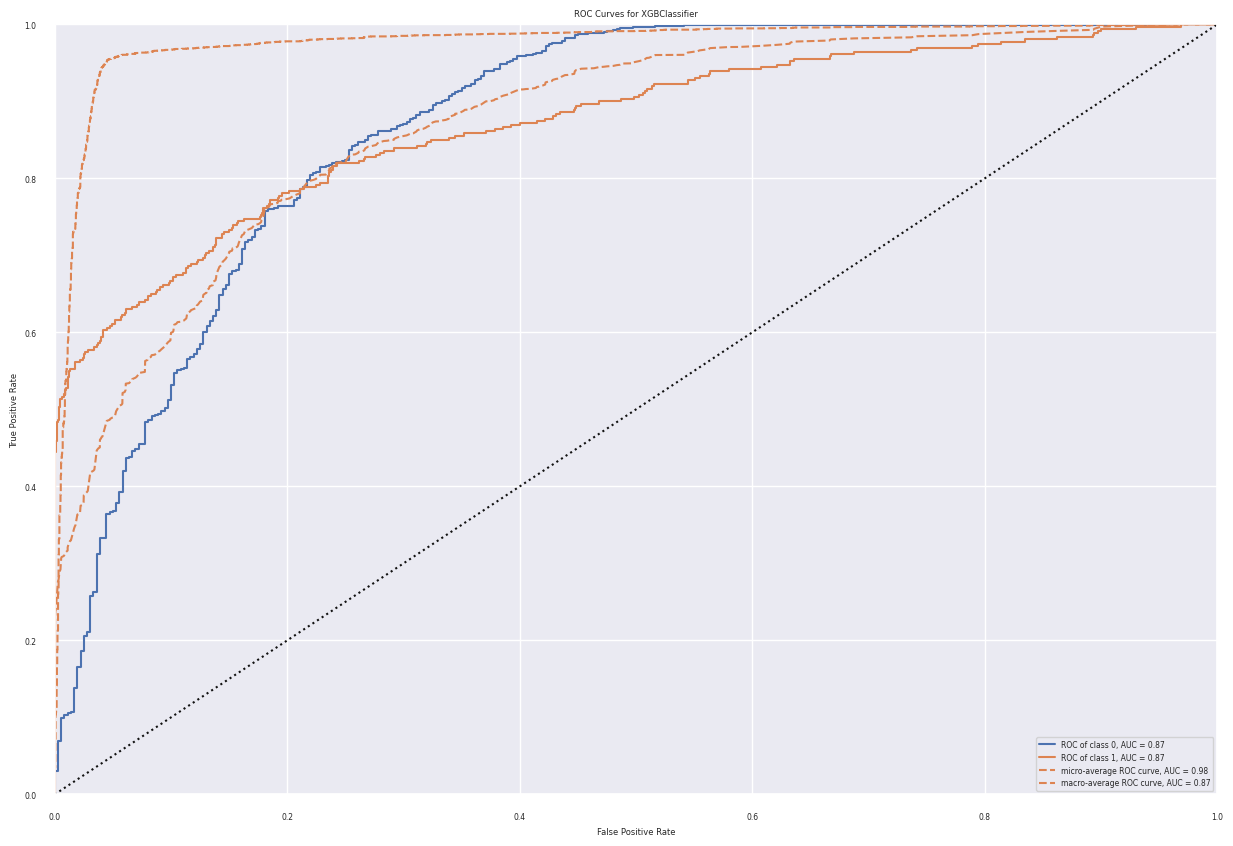

In [79]:
plot_model(oil_xgboost, plot= 'auc')

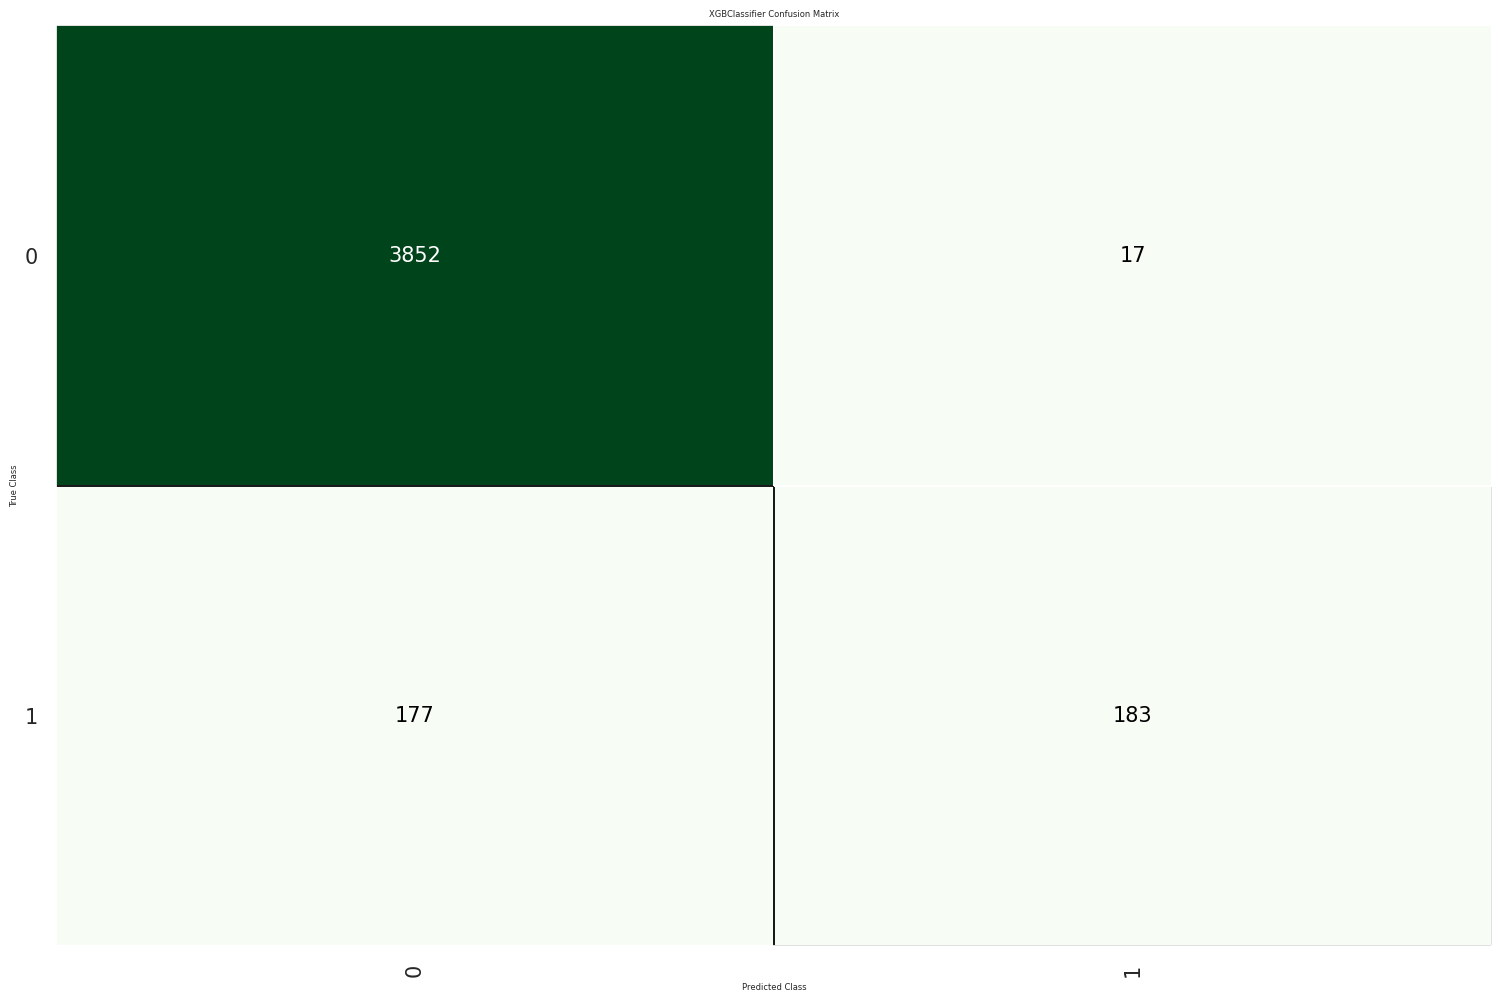

In [80]:
plot_model(oil_xgboost, plot= 'confusion_matrix')

In [81]:
oil_lightgbm = create_model('lightgbm', verbose = False)
# plot_model(estimator = oil_lightgbm, plot = 'feature')

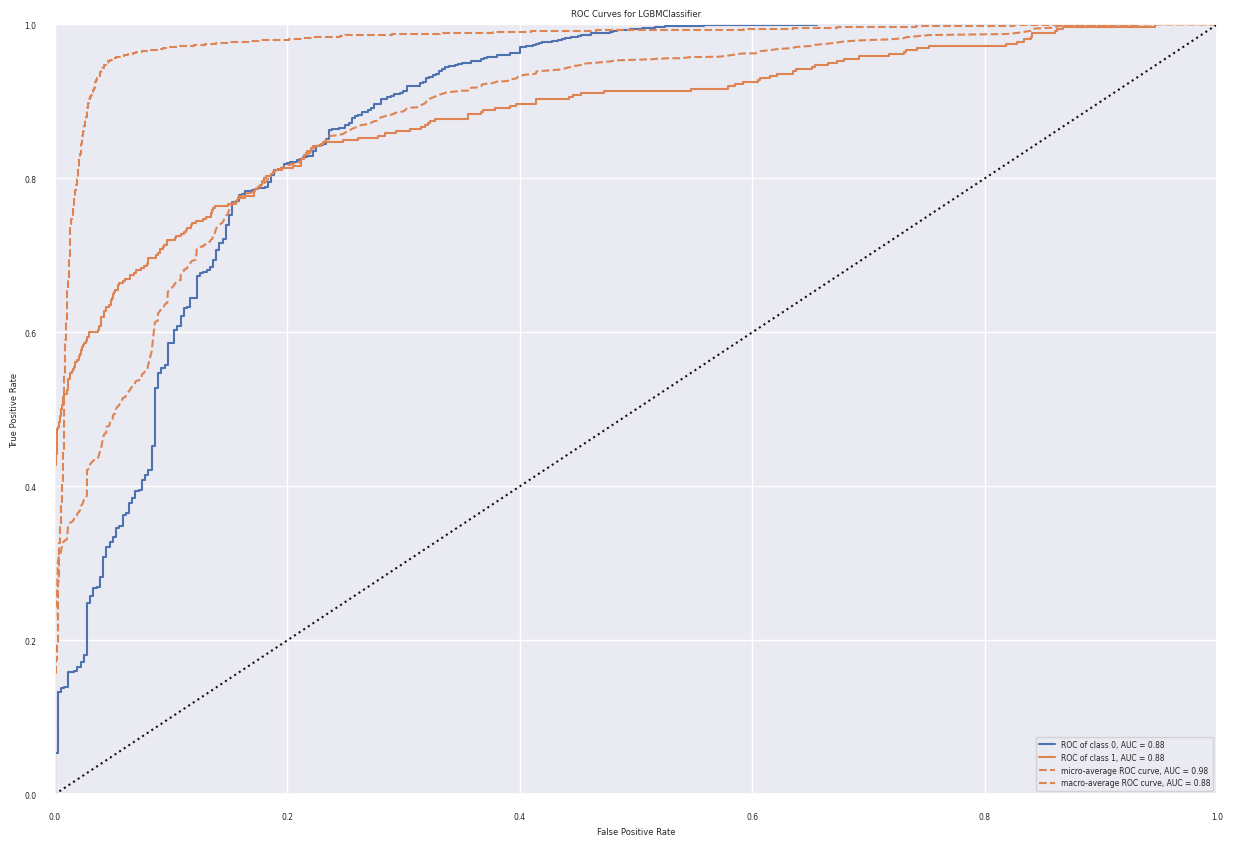

In [82]:
plot_model(oil_lightgbm, plot= 'auc')

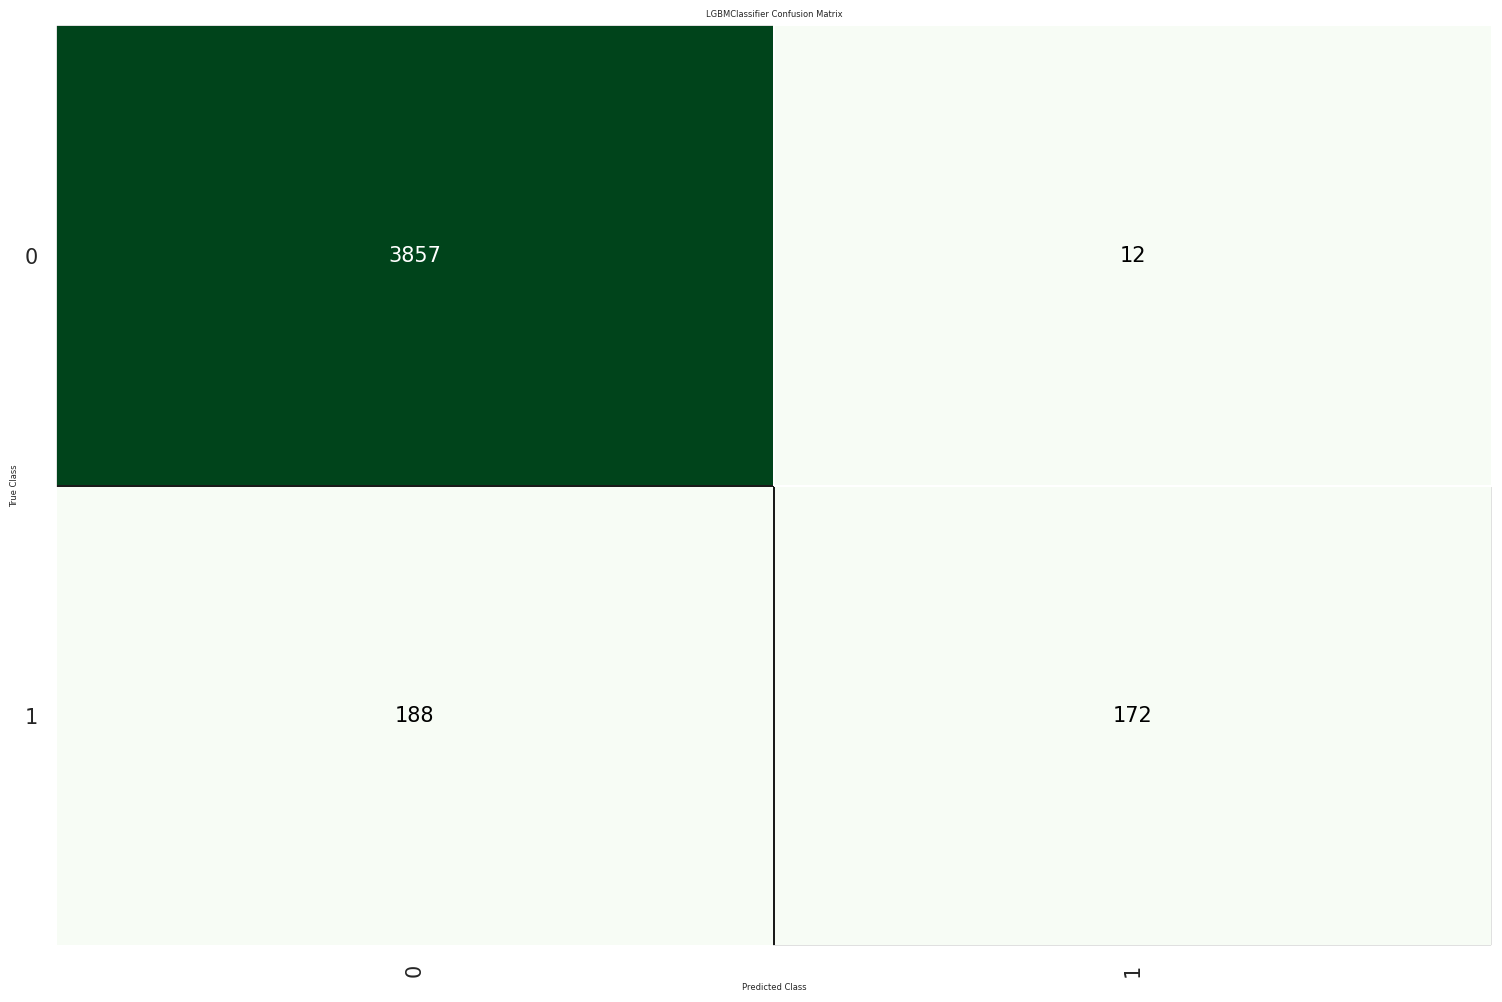

In [84]:
plot_model(oil_lightgbm, plot= 'confusion_matrix')

In [83]:
oil_catboost = create_model('catboost', verbose = False)
# plot_model(estimator = oil_catboost, plot = 'feature')

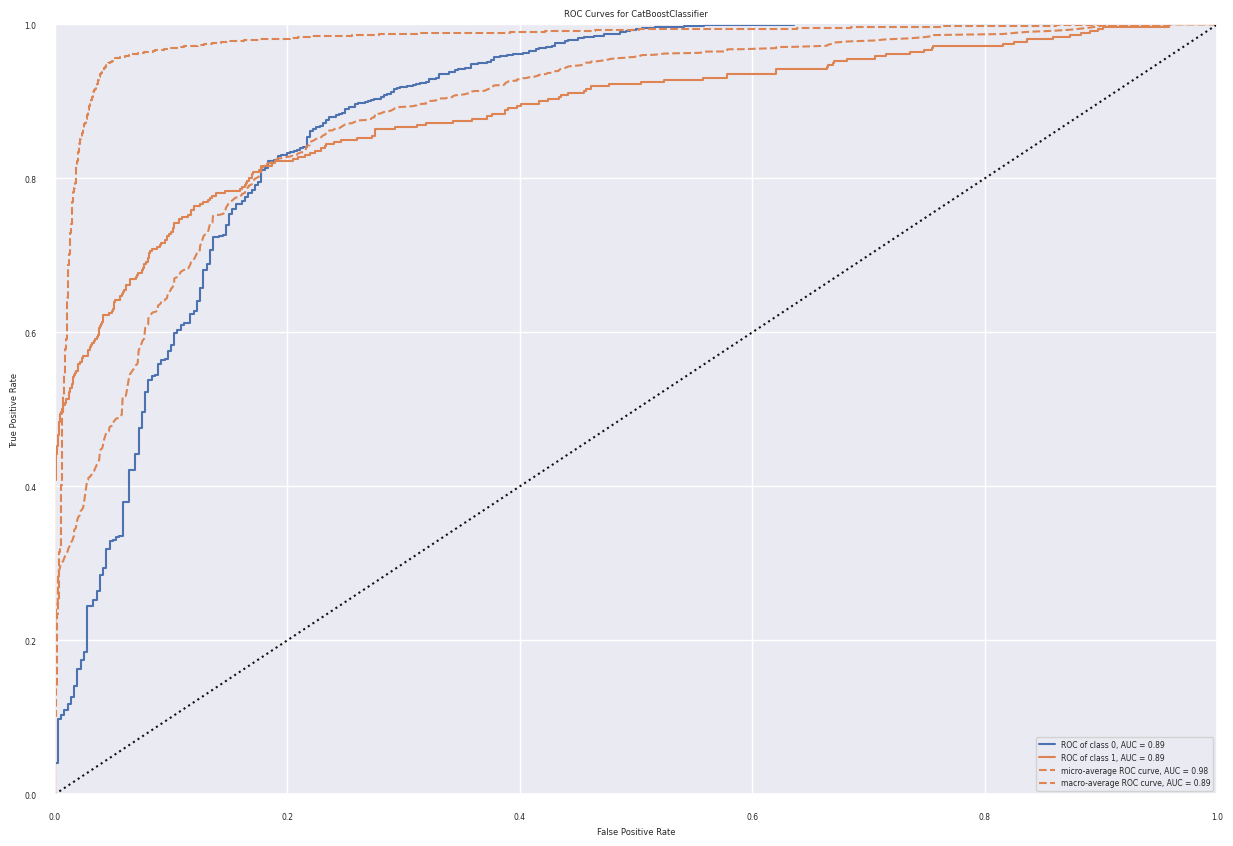

In [85]:
plot_model(oil_catboost, plot= 'auc')

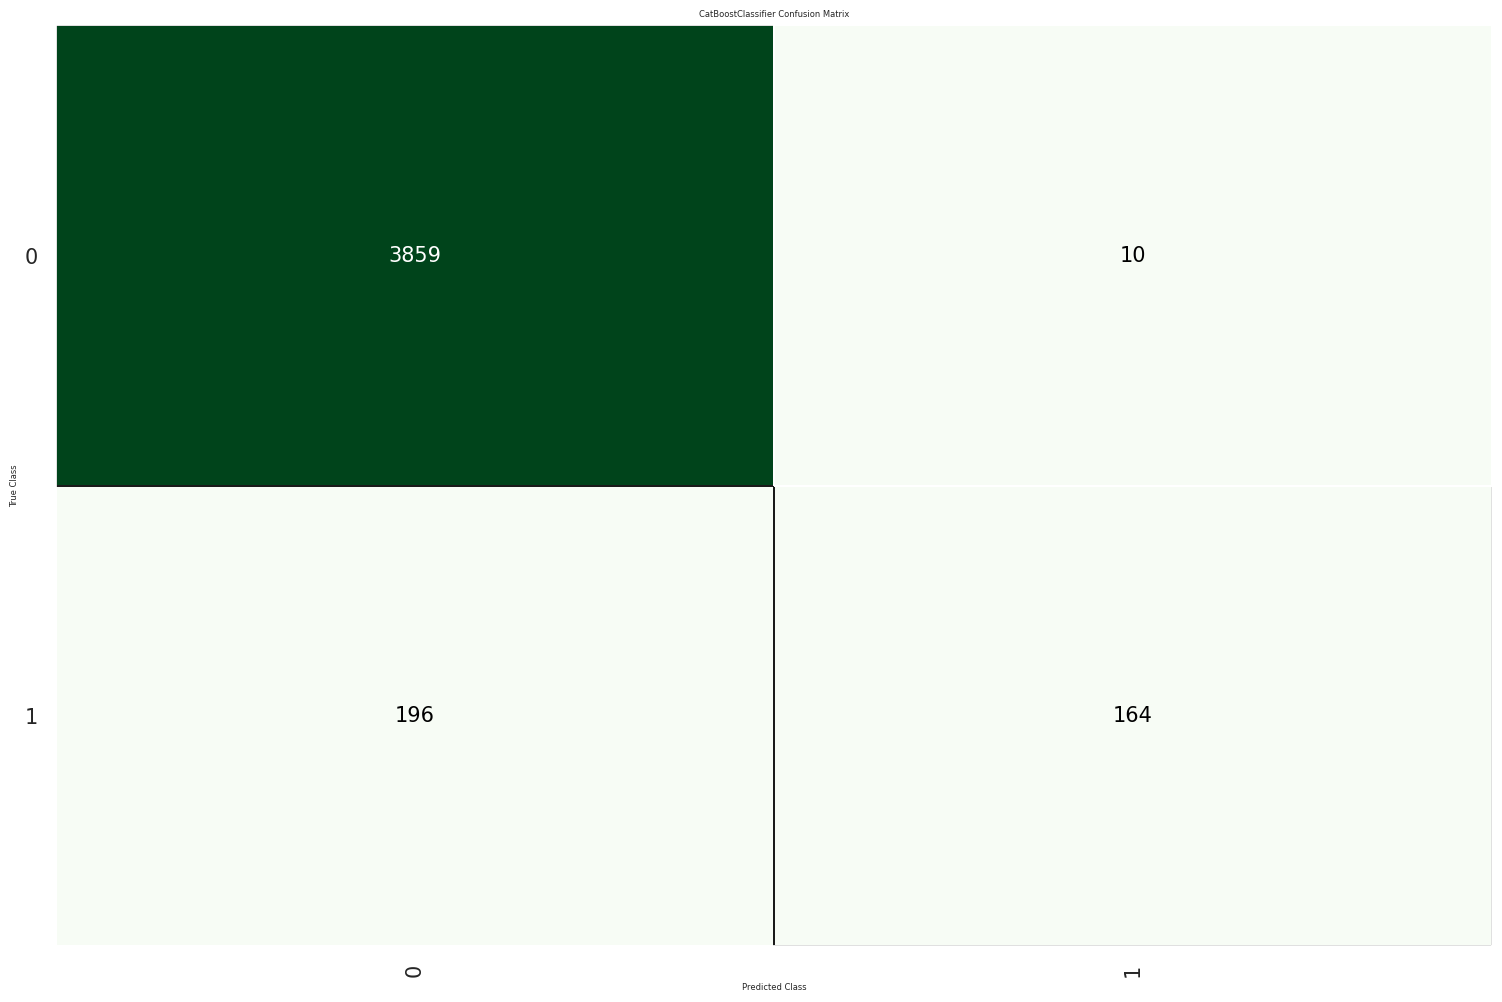

In [87]:
plot_model(oil_catboost, plot = 'confusion_matrix')

이제, Stacking을 통하여 각 모델들을 조합해보도록 하겠습니다.

In [20]:
stack_xgboost_lightgbm = stack_models(estimator_list = [oil_xgboost, oil_lightgbm])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9392,0.7784,0.3810,0.8000,0.5161,0.4880,0.5265
1,0.9534,0.8563,0.5119,0.8958,0.6515,0.6285,0.6569
2,0.9635,0.8447,0.5833,0.9800,0.7313,0.7131,0.7408
3,0.9504,0.8408,0.5294,0.8333,0.6475,0.6222,0.6408
4,0.9595,0.8552,0.5529,0.9592,0.7015,0.6814,0.7113
5,0.9493,0.7667,0.4471,0.9268,0.6032,0.5796,0.6239
6,0.9483,0.7945,0.4524,0.8837,0.5984,0.5738,0.6108
7,0.9462,0.8101,0.3929,0.9429,0.5546,0.5311,0.5894
8,0.9574,0.8268,0.5595,0.9038,0.6912,0.6697,0.6919


In [106]:
plot_model(stack_xgboost_lightgbm, plot = 'auc')

ValueError: Plot Not Available. Please see docstring for list of available Plots.

In [107]:
plot_model(stack_xgboost_lightgbm, plot = 'confusion_matrix')

ValueError: Plot Not Available. Please see docstring for list of available Plots.

In [21]:
stack_xgboost_catboost = stack_models(estimator_list = [oil_xgboost, oil_catboost])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9392,0.7858,0.3810,0.8000,0.5161,0.4880,0.5265
1,0.9534,0.8596,0.5119,0.8958,0.6515,0.6285,0.6569
2,0.9635,0.8420,0.5833,0.9800,0.7313,0.7131,0.7408
3,0.9514,0.8373,0.5294,0.8491,0.6522,0.6275,0.6478
4,0.9595,0.8572,0.5529,0.9592,0.7015,0.6814,0.7113
5,0.9504,0.7647,0.4471,0.9500,0.6080,0.5851,0.6329
6,0.9483,0.7964,0.4524,0.8837,0.5984,0.5738,0.6108
7,0.9462,0.8113,0.3929,0.9429,0.5546,0.5311,0.5894
8,0.9574,0.8306,0.5595,0.9038,0.6912,0.6697,0.6919


In [22]:
stack_catboost_lightgbm = stack_models(estimator_list = [oil_catboost, oil_lightgbm])

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:36:18
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Classifier


,Fold,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


KeyboardInterrupt: 

In [ ]:
stack_all = stack_models(estimator_list = [oil_catboost, oil_lightgbm, oil_xgboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25.9278,1610.3127,40.1287,0.9512,0.4395,0.4153
1,24.7794,1640.4038,40.5019,0.9475,0.4242,0.4340
2,24.5095,1366.5767,36.9672,0.9635,0.4231,0.3914
3,23.9143,1323.2840,36.3770,0.9601,0.3982,0.3872
4,23.1862,1401.7144,37.4395,0.9529,0.4104,0.4098
5,23.7096,1460.1254,38.2116,0.9562,0.4719,0.4282
6,24.5920,1509.6875,38.8547,0.9519,0.4121,0.3477
7,25.2684,1862.8303,43.1605,0.9444,0.4188,0.4104
8,22.8370,1238.7346,35.1957,0.9624,0.4209,0.4110


해당 Tutorial R^{2}을 기준으로 단일 Catboost를 통한 결과값이 가장 좋게 나왔습니다. 이에 단일 Catboost를 Test data에 넣어보도록 한 후, 최종 결과값을 내 보도록 하겠습니다. 

In [121]:
# 최종 모델 선정
final_classification = finalize_model(oil_lightgbm)

# 선정한 모델에 Test data 넣어서 최종 output 도출
predict_classification = predict_model(final_classification, data = oil_test)

KeyError: "None of [Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',\n       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],\n      dtype='object')] are in the [columns]"

In [54]:
predict_classification.to_csv('result.csv')

### Pycaret에서 제공하는 Traffic 데이터

In [89]:
# Pycaret에서 제공하는 bike 데이터

# bike_dataset = get_data('bike', profile=True)
bike_dataset = get_data('bike')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [90]:
# Pycaret에서 제공하는 bike 데이터

bike_train = bike_dataset.sample(frac=0.90, random_state=786)
bike_test = bike_dataset.drop(bike_train.index)
bike_train.reset_index(inplace=True, drop=True)
bike_test.reset_index(inplace=True, drop=True)
print(f"bike Train data: {str(bike_train.shape)}")
print(f"bike Test data: {str(bike_test.shape)}")

bike Train data: (15641, 15)
bike Test data: (1738, 15)


In [91]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15641 entries, 0 to 15640
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  int64  
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  int64  
 3   yr          15641 non-null  int64  
 4   mnth        15641 non-null  int64  
 5   hr          15641 non-null  int64  
 6   holiday     15641 non-null  int64  
 7   weekday     15641 non-null  int64  
 8   workingday  15641 non-null  int64  
 9   weathersit  15641 non-null  int64  
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  cnt         15641 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 1.8+ MB


In [92]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     1738 non-null   int64  
 1   dteday      1738 non-null   object 
 2   season      1738 non-null   int64  
 3   yr          1738 non-null   int64  
 4   mnth        1738 non-null   int64  
 5   hr          1738 non-null   int64  
 6   holiday     1738 non-null   int64  
 7   weekday     1738 non-null   int64  
 8   workingday  1738 non-null   int64  
 9   weathersit  1738 non-null   int64  
 10  temp        1738 non-null   float64
 11  atemp       1738 non-null   float64
 12  hum         1738 non-null   float64
 13  windspeed   1738 non-null   float64
 14  cnt         1738 non-null   int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 203.8+ KB


In [93]:
bike_train

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,13453,7/19/2012,3,1,7,17,0,4,1,1,0.86,0.7879,0.41,0.0000,771
1,13663,7/28/2012,3,1,7,11,0,6,0,1,0.84,0.7424,0.39,0.2239,457
2,14933,9/19/2012,3,1,9,9,0,3,1,1,0.54,0.5152,0.60,0.2537,362
3,4498,7/11/2011,3,0,7,7,0,1,1,1,0.70,0.6667,0.74,0.2537,317
4,8779,1/6/2012,1,1,1,14,0,5,1,1,0.46,0.4545,0.36,0.1940,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15636,2797,5/1/2011,2,0,5,10,0,0,0,2,0.48,0.4697,0.63,0.1940,264
15637,2876,5/4/2011,2,0,5,17,0,3,1,1,0.40,0.4091,0.71,0.2537,410
15638,10328,3/11/2012,1,1,3,10,0,0,0,1,0.32,0.3030,0.49,0.2836,218
15639,2084,4/1/2011,2,0,4,16,0,5,1,1,0.34,0.3030,0.46,0.4179,167


In [94]:
from pycaret.regression import *

In [95]:
bike_train_data = setup(data = bike_train, target = 'cnt', session_id=41)

,Description,Value
0,session_id,41
1,Target,cnt
2,Original Data,"(15641, 15)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10948, 38)"


다음과 같이, 모든 방법론들이  좋은 결과를 보임을 알 수 있었습니다.

In [96]:
model_compare = compare_models( ['xgboost', 'lightgbm', 'catboost'], n_select = 4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,24.6753,1547.4607,39.2607,0.9524,0.4360,0.4345,3.1660
xgboost,Extreme Gradient Boosting,25.5609,1640.7671,40.4414,0.9495,0.4419,0.4274,0.7010
lightgbm,Light Gradient Boosting Machine,25.8494,1703.3213,41.2076,0.9475,0.4190,0.4278,0.0640


다음과 같이, 각 개별 모델들을 만들 수 있습니다.

In [97]:
bike_xgboost = create_model('xgboost', verbose = False)
# plot_model(estimator = bike_xgboost, plot = 'feature')

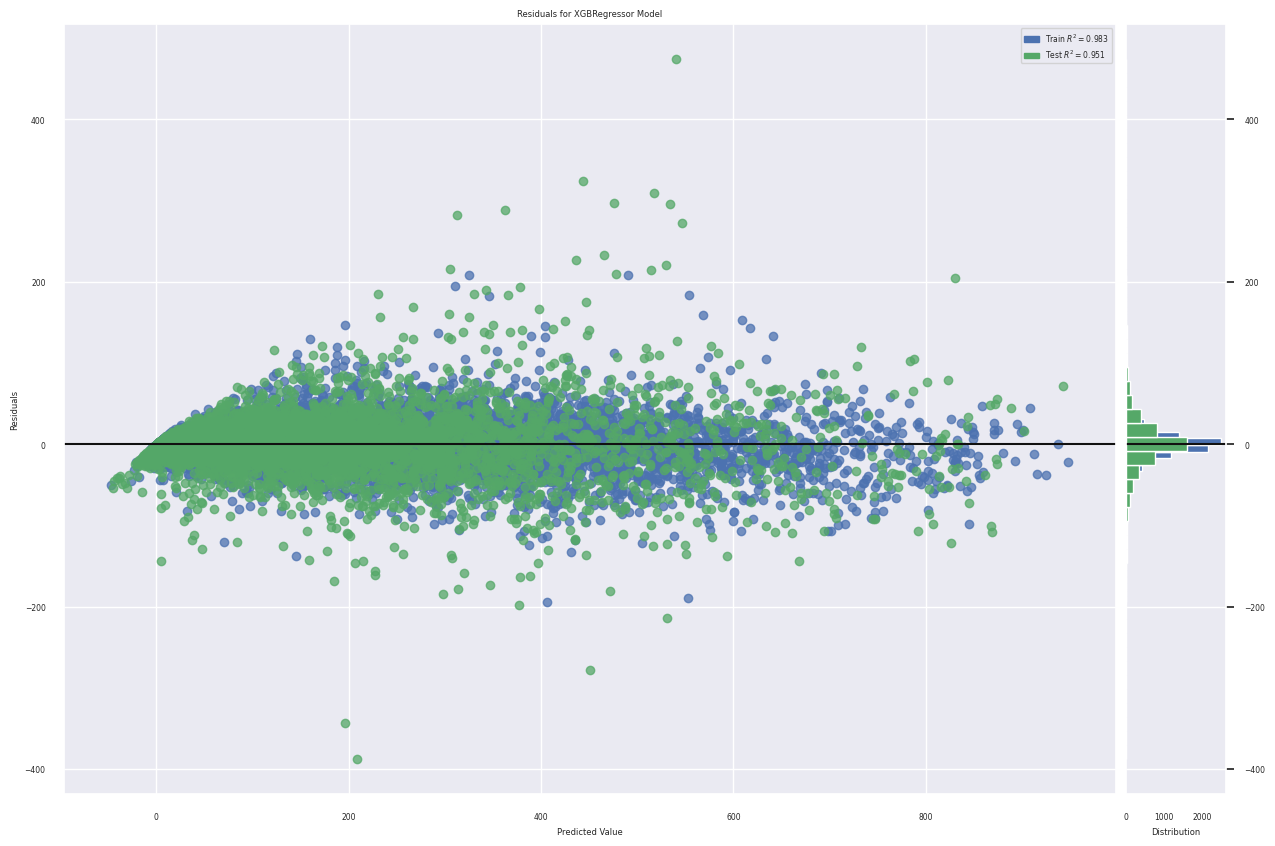

In [98]:
plot_model(estimator = bike_xgboost, plot = 'residuals')

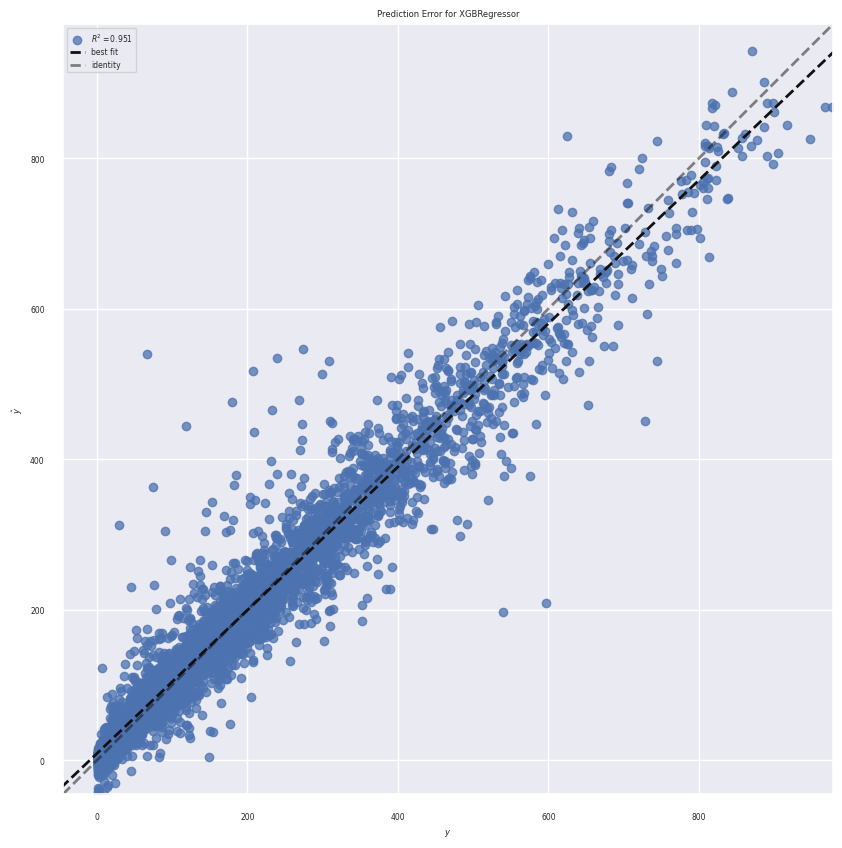

In [99]:
plot_model(estimator = bike_xgboost, plot = 'error')

In [100]:
bike_lightgbm = create_model('lightgbm', verbose = False)
# plot_model(estimator = bike_lightgbm, plot = 'feature')

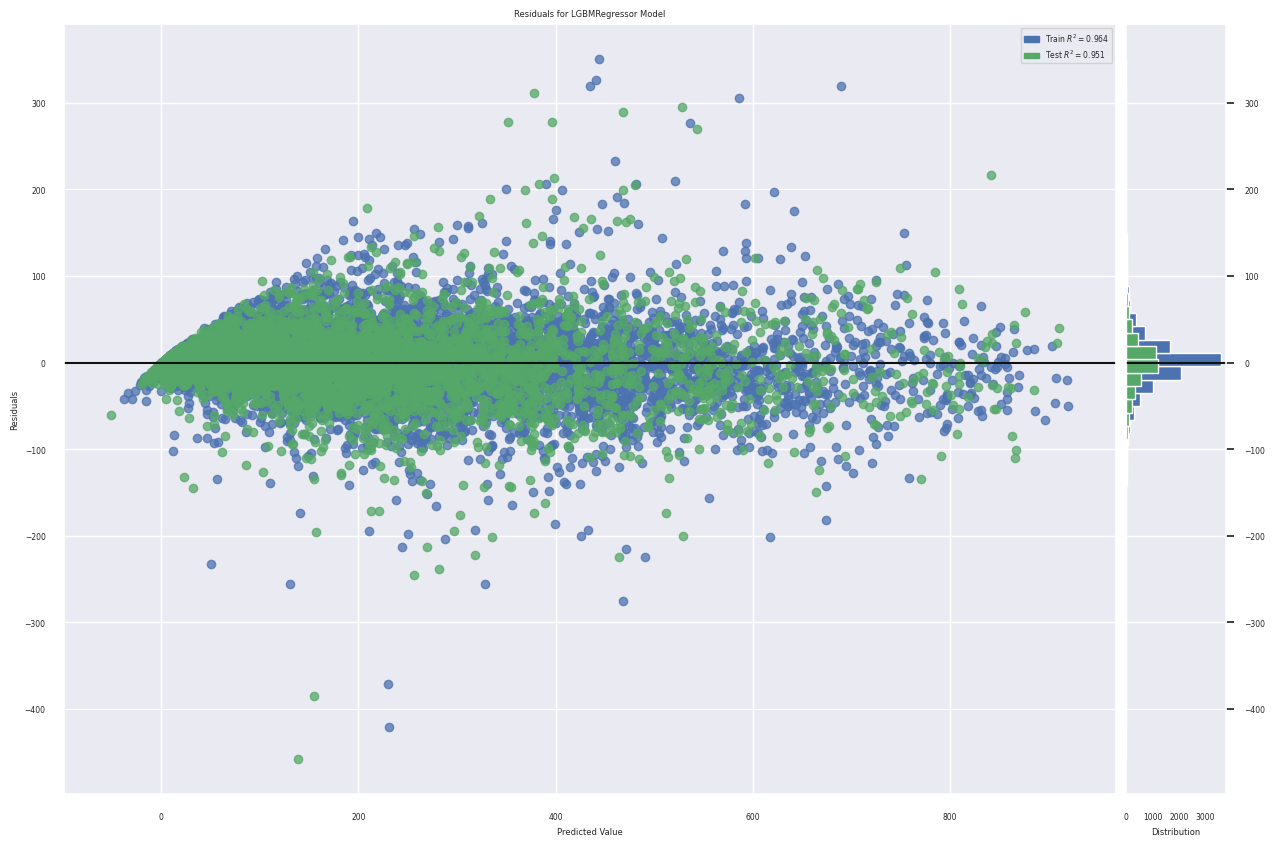

In [101]:
plot_model(estimator = bike_lightgbm, plot = 'residuals')

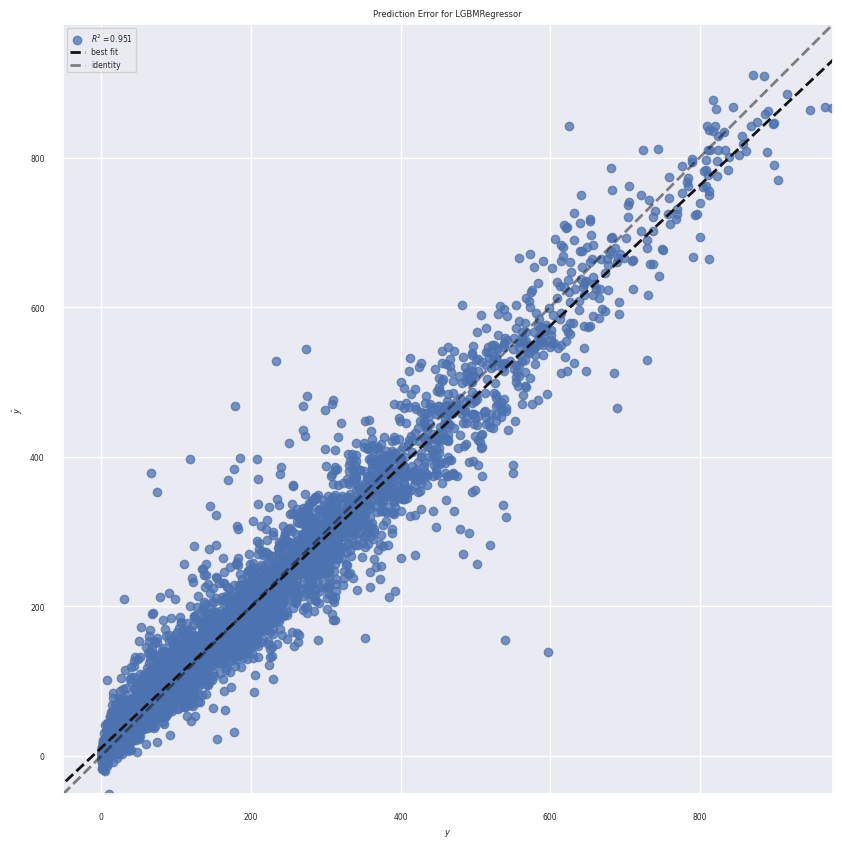

In [102]:
plot_model(estimator = bike_lightgbm, plot = 'error')

In [103]:
bike_catboost = create_model('catboost', verbose = False)
# plot_model(estimator = bike_catboost, plot = 'feature')

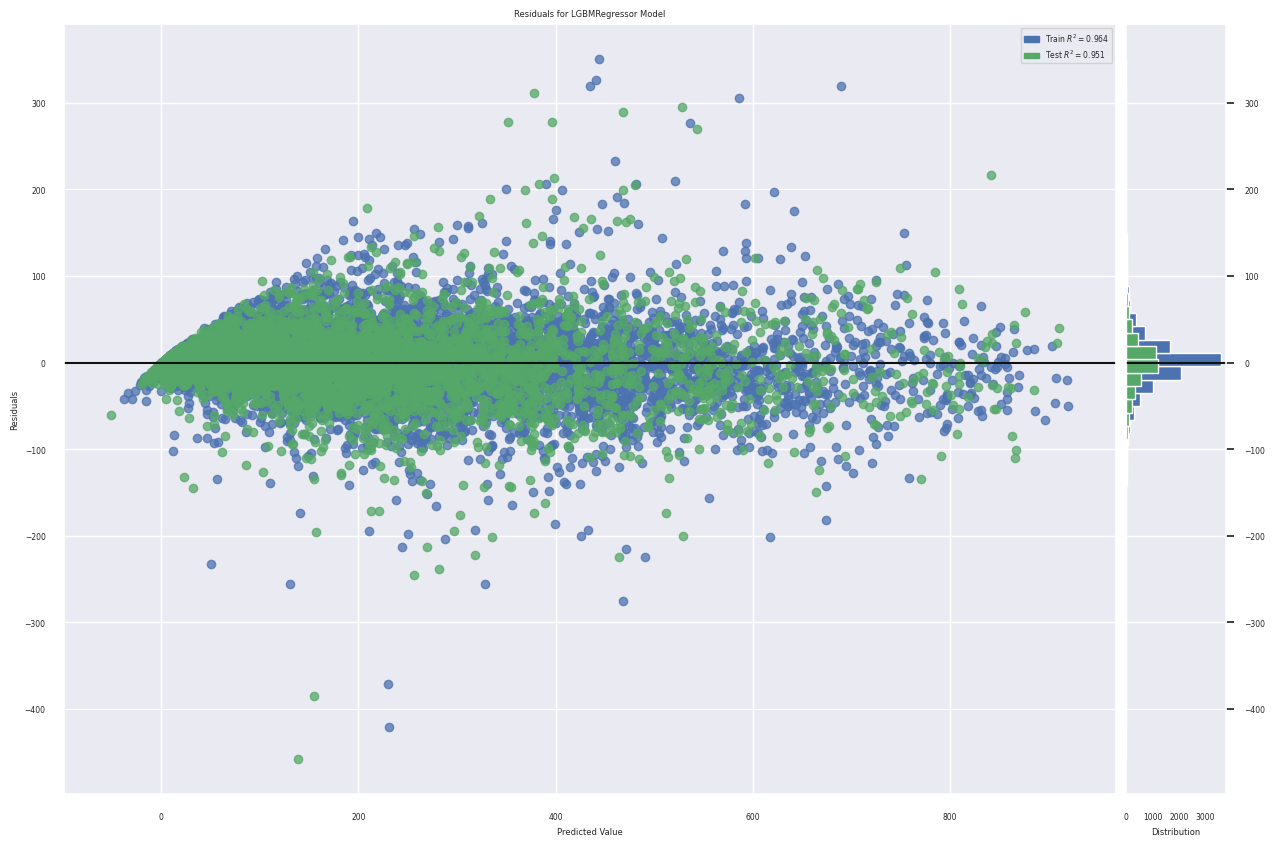

In [104]:
plot_model(estimator = bike_lightgbm, plot = 'residuals')

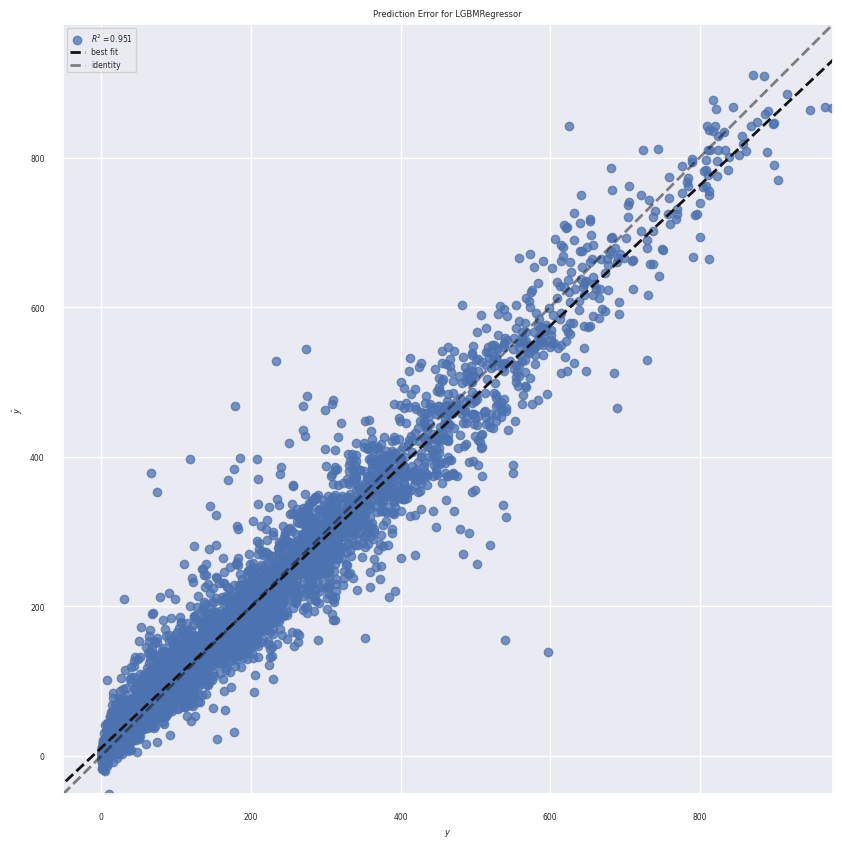

In [105]:
plot_model(estimator = bike_lightgbm, plot = 'error')

이제, Stacking을 통하여 각 모델들을 조합해보도록 하겠습니다.

In [115]:
stack_xgboost_lightgbm = stack_models(estimator_list = [bike_xgboost, bike_lightgbm])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.1883,1573.2565,39.6643,0.9480,0.4132,0.4231
1,24.1350,1545.4317,39.3120,0.9535,0.3523,0.3093
2,24.3449,1763.8508,41.9982,0.9481,0.4148,0.3935
3,23.3484,1223.1282,34.9732,0.9653,0.4047,0.3936
4,23.8164,1405.6894,37.4925,0.9568,0.4059,0.3667
5,26.7071,1845.4682,42.9589,0.9445,0.3963,0.3623
6,24.0338,1522.8943,39.0243,0.9521,0.4274,0.4110
7,23.0345,1299.5577,36.0494,0.9560,0.4015,0.4115
8,22.6849,1492.1607,38.6285,0.9501,0.4187,0.4191


In [116]:
stack_xgboost_catboost = stack_models(estimator_list = [bike_xgboost, bike_catboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.3242,1609.6777,40.1208,0.9468,0.4374,0.4755
1,23.9922,1511.2881,38.8753,0.9545,0.3963,0.3608
2,24.6294,1808.2874,42.5240,0.9468,0.4739,0.4342
3,23.1807,1220.3580,34.9336,0.9654,0.4430,0.3881
4,23.6715,1366.3724,36.9645,0.9580,0.3921,0.3717
5,26.1915,1741.5978,41.7325,0.9476,0.4240,0.3727
6,23.6090,1449.9141,38.0777,0.9544,0.4149,0.4058
7,22.6777,1214.4616,34.8491,0.9589,0.4271,0.4114
8,22.2167,1444.6493,38.0085,0.9517,0.4400,0.4300


In [117]:
stack_catboost_lightgbm = stack_models(estimator_list = [bike_catboost, bike_lightgbm])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.4608,1651.9570,40.6443,0.9454,0.4344,0.4552
1,24.3196,1534.3083,39.1702,0.9538,0.3758,0.3431
2,24.4387,1795.3595,42.3717,0.9471,0.4501,0.4190
3,23.1245,1232.8130,35.1114,0.9650,0.4452,0.3911
4,24.0932,1454.0071,38.1314,0.9553,0.4031,0.3801
5,26.5614,1794.7259,42.3642,0.9460,0.4052,0.3703
6,23.9886,1500.0997,38.7311,0.9529,0.4380,0.4052
7,22.5279,1234.2720,35.1322,0.9582,0.4033,0.4077
8,22.3295,1438.3952,37.9262,0.9519,0.4230,0.4331


In [118]:
stack_all = stack_models(estimator_list = [bike_catboost, bike_lightgbm, bike_xgboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23.8154,1573.5024,39.6674,0.9480,0.4291,0.4345
1,23.7385,1492.5231,38.6332,0.9550,0.3583,0.3258
2,24.1012,1760.6059,41.9596,0.9482,0.4508,0.4073
3,22.8023,1191.0499,34.5116,0.9662,0.4119,0.3745
4,23.4249,1367.4644,36.9792,0.9579,0.3780,0.3582
5,25.9596,1746.2462,41.7881,0.9475,0.4016,0.3582
6,23.4263,1449.1095,38.0672,0.9545,0.4181,0.3899
7,22.3291,1211.3412,34.8043,0.9590,0.4150,0.3945
8,22.0327,1428.1717,37.7912,0.9522,0.4168,0.4159


해당 Tutorial R^{2}을 기준으로 단일 Catboost를 통한 결과값이 가장 좋게 나왔습니다. 이에 단일 Catboost를 Test data에 넣어보도록 한 후, 최종 결과값을 내 보도록 하겠습니다. 

In [119]:
# 최종 모델 선정
final_regression = finalize_model(bike_catboost)

# 선정한 모델에 Test data 넣어서 최종 output 도출
predict_regression = predict_model(final_regression, data = bike_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,23.5415,1482.3556,38.5014,0.9575,0.4264,0.4458


In [120]:
plot_model(estimator = predict_regression, plot = 'residuals')

ValueError: Estimator       instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0           2    1/1/2011       1   0     1   1        0        6           0   
1           6    1/1/2011       1   0     1   5        0        6           0   
2           9    1/1/2011       1   0     1   8        0        6           0   
3          13    1/1/2011       1   0     1  12        0        6           0   
4          19    1/1/2011       1   0     1  18        0        6           0   
...       ...         ...     ...  ..   ...  ..      ...      ...         ...   
1733    17363  12/31/2012       1   1    12   7        0        1           1   
1734    17364  12/31/2012       1   1    12   8        0        1           1   
1735    17366  12/31/2012       1   1    12  10        0        1           1   
1736    17372  12/31/2012       1   1    12  16        0        1           1   
1737    17379  12/31/2012       1   1    12  23        0        1           1   

      weathersit  temp   atemp   hum  windspeed  cnt       Label  
0              1  0.22  0.2727  0.80     0.0000   40   23.018845  
1              2  0.24  0.2576  0.75     0.0896    1   -8.583951  
2              1  0.24  0.2879  0.75     0.0000    8   17.095387  
3              1  0.42  0.4242  0.77     0.2836   84  121.937964  
4              3  0.42  0.4242  0.88     0.2537   35   10.289985  
...          ...   ...     ...   ...        ...  ...         ...  
1733           1  0.16  0.1818  0.64     0.1343   85  168.293110  
1734           1  0.14  0.1515  0.69     0.1343  196  342.436964  
1735           2  0.20  0.2121  0.69     0.1343  120  110.385599  
1736           2  0.26  0.2576  0.48     0.1940  214  237.369856  
1737           1  0.26  0.2727  0.65     0.1343   49   14.415692  

[1738 rows x 16 columns] does not have the required fit() method.

In [ ]:
plot_model(estimator = predict_regression, plot = 'errors')

최종적으로 다음과 같은 Score를 가지는 Catboost model을 만들 수 있었습니다.  